# Problem statement

In [180]:


"""
Docstring instructions 

YAou will be working as a data analyst for a European sports clothes company
trying to expand internationally.

Define business problem: 

    Where should they expand to and why?
    
    Where to expand
    
    Why to expand

Report structure:

    -Breakdown of the business problem
    -Findings and recommendations to the business questions
    -Assumptions made, data quality and availability constraints
    -Detailed analysis of the data provided
    -Details of how the answers have been derived from the data
    
Idea = where to expand according to a wicklund analysis 
Incluir correlacions y heatmap 

"""

'\nDocstring instructions \n\nYAou will be working as a data analyst for a European sports clothes company\ntrying to expand internationally.\n\nDefine business problem: \n\n    Where should they expand to and why?\n    \n    Where to expand\n    \n    Why to expand\n\nReport structure:\n\n    -Breakdown of the business problem\n    -Findings and recommendations to the business questions\n    -Assumptions made, data quality and availability constraints\n    -Detailed analysis of the data provided\n    -Details of how the answers have been derived from the data\n    \nIdea = where to expand according to a wicklund analysis \nIncluir correlacions y heatmap \n\n'

# Preparing dataframe 1 

In [264]:

#Used Packages 
import pandas as pd
import seaborn as sns 
import numpy as np 
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import os 

In [265]:
#Path Library 

countries_file = './World Bank/countries-of-the-world/countries of the world.csv' 
population_file = './World Bank/population-by-country-2020/population_by_country_2020.csv'  
life_quality_file = './World Bank/countries-dataset-2020/Quality of life index by countries 2020.csv'
developed_countries = './World Bank/list_of_developed_countries.csv'
cost_of_living_file = './World Bank/2020-cost-of-living/cost of living 2020.csv'
fifa_file = './World Bank/world-countries-and-continents-details/countries and continents.csv'


In [267]:
#creating dataframes 
#healthcare index add 
countries = pd.read_csv(countries_file)
population = pd.read_csv(population_file)
life_quality = pd.read_csv(life_quality_file)
developed = pd.read_csv(developed_countries)
cost_of_living = pd.read_csv(cost_of_living_file)
fifa = pd.read_csv(fifa_file)


## GDP Per Capita Table 

In [184]:
#Here we analyze the dataset to see the type of datas we have 
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [185]:
#View of the column data
countries.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [186]:
#We create an access to the columns we are most interested in. 
#Population (market)
#Gdp per capita (purchasing power) 

cd = countries.loc[:, ['Country', 'Population', 'GDP ($ per capita)']]

#After this, we evaluate if the data is clean and without null values, data types should be correct. 

cd.isnull().sum()


Country               0
Population            0
GDP ($ per capita)    1
dtype: int64

In [187]:
#We find that 1 value is null, so we fill it with the median GDP to normalize the data 
cd['GDP ($ per capita)'] = cd['GDP ($ per capita)'].fillna(cd['GDP ($ per capita)'].median())

#We confirm once again that the nulls have been replaced by the median 
cd.isnull().sum()

Country               0
Population            0
GDP ($ per capita)    0
dtype: int64

In [188]:
#This is our first table with DGP per Capita to determine our markets. 
#We don't need Population, since we have another dataset with 2020 data. 
gdp = cd.drop('Population', axis='columns')
gdp.head()

,Country,GDP ($ per capita)
0,Afghanistan,700.0
1,Albania,4500.0
2,Algeria,6000.0
3,American Samoa,8000.0
4,Andorra,19000.0


In [189]:
gdp.tail()

,Country,GDP ($ per capita)
222,West Bank,800.0
223,Western Sahara,5550.0
224,Yemen,800.0
225,Zambia,800.0
226,Zimbabwe,1900.0


In [190]:
#Finally we review how big the data set list

gdp.shape


(227, 2)

## Population Table 

In [191]:
#We select know the Population data set to get the 2020 data.
#Selected columns: Population, Density, Med Age, Urban Pop %, World Share 

pop = population.loc[:, ['Country (or dependency)', 'Population (2020)', 'Density (P/Km²)','Med. Age','Urban Pop %','World Share']]

#We review the information, our primary key would be country which is also an Object like our gdp table 
pop.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Country (or dependency)  235 non-null    object
 1   Population (2020)        235 non-null    int64 
 2   Density (P/Km²)          235 non-null    int64 
 3   Med. Age                 235 non-null    object
 4   Urban Pop %              235 non-null    object
 5   World Share              235 non-null    object
dtypes: int64(2), object(4)
memory usage: 11.1+ KB


In [192]:
#We can confirm that the data has no nulls 
pop.isnull().sum()

Country (or dependency)    0
Population (2020)          0
Density (P/Km²)            0
Med. Age                   0
Urban Pop %                0
World Share                0
dtype: int64

In [193]:
#Now we review the table data 

pop.head()

,Country (or dependency),Population (2020),Density (P/Km²),Med. Age,Urban Pop %,World Share
0,China,1440297825,153,38,61 %,18.47 %
1,India,1382345085,464,28,35 %,17.70 %
2,United States,331341050,36,38,83 %,4.25 %
3,Indonesia,274021604,151,30,56 %,3.51 %
4,Pakistan,221612785,287,23,35 %,2.83 %


In [194]:
#We also notice several N.A's on median age, this will be preserved as this countries are the least populated 
pop.tail()

,Country (or dependency),Population (2020),Density (P/Km²),Med. Age,Urban Pop %,World Share
230,Montserrat,4993,50,N.A.,10 %,0.00 %
231,Falkland Islands,3497,0,N.A.,66 %,0.00 %
232,Niue,1628,6,N.A.,46 %,0.00 %
233,Tokelau,1360,136,N.A.,0 %,0.00 %
234,Holy See,801,2003,N.A.,N.A.,0.00 %


In [195]:
#Here we notice that this table has sligthly more rows, therefore it will be our left table for merge 

pop.shape

(235, 6)

## Merging GDP and Population tables 

In [196]:
#We notice that there may be spaces within the Country names
#We perform strip function on primary keys 

gdp['Country'] = gdp['Country'].str.strip()
pop['Country (or dependency)'] = pop['Country (or dependency)'].str.strip()



In [197]:
# Tables should be prepared for merge
# We validate the information as to ensure that the merge was done  correctly within primary keys 

demographic = pd.merge(pop, gdp, left_on='Country (or dependency)', right_on='Country', how='left')
demographic.head(15)

,Country (or dependency),Population (2020),Density (P/Km²),Med. Age,Urban Pop %,World Share,Country,GDP ($ per capita)
0,China,1440297825,153,38,61 %,18.47 %,China,5000.0
1,India,1382345085,464,28,35 %,17.70 %,India,2900.0
2,United States,331341050,36,38,83 %,4.25 %,United States,37800.0
3,Indonesia,274021604,151,30,56 %,3.51 %,Indonesia,3200.0
4,Pakistan,221612785,287,23,35 %,2.83 %,Pakistan,2100.0
5,Brazil,212821986,25,33,88 %,2.73 %,Brazil,7600.0
6,Nigeria,206984347,226,18,52 %,2.64 %,Nigeria,900.0
7,Bangladesh,164972348,1265,28,39 %,2.11 %,Bangladesh,1900.0
8,Russia,145945524,9,40,74 %,1.87 %,Russia,8900.0
9,Mexico,129166028,66,29,84 %,1.65 %,Mexico,9000.0


In [198]:
demographic.tail(15)

,Country (or dependency),Population (2020),Density (P/Km²),Med. Age,Urban Pop %,World Share,Country,GDP ($ per capita)
220,Caribbean Netherlands,26265,80,N.A.,75 %,0.00 %,NaN,NaN
221,Palau,18109,39,N.A.,N.A.,0.00 %,Palau,9000.0
222,Cook Islands,17567,73,N.A.,75 %,0.00 %,Cook Islands,5000.0
223,Anguilla,15026,167,N.A.,N.A.,0.00 %,Anguilla,8600.0
224,Tuvalu,11817,393,N.A.,62 %,0.00 %,Tuvalu,1100.0
225,Wallis & Futuna,11203,80,N.A.,0 %,0.00 %,NaN,NaN
226,Nauru,10836,541,N.A.,N.A.,0.00 %,Nauru,5000.0
227,Saint Barthelemy,9882,470,N.A.,0 %,0.00 %,NaN,NaN
228,Saint Helena,6080,16,N.A.,27 %,0.00 %,Saint Helena,2500.0
229,Saint Pierre & Miquelon,5789,25,N.A.,100 %,0.00 %,NaN,NaN


In [199]:
demographic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 0 to 234
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (or dependency)  235 non-null    object 
 1   Population (2020)        235 non-null    int64  
 2   Density (P/Km²)          235 non-null    int64  
 3   Med. Age                 235 non-null    object 
 4   Urban Pop %              235 non-null    object 
 5   World Share              235 non-null    object 
 6   Country                  194 non-null    object 
 7   GDP ($ per capita)       194 non-null    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 16.5+ KB


In [200]:
#We drop the "Country" column, as it is duplicated and no longer needed.
#We also rename the Country (or dependency) as to make it clearer 

demo = demographic.copy()
demo_clean = demo.drop('Country', axis='columns')
demo_clean.rename(columns = {'Country (or dependency)':'Country'},inplace = True)
demo_clean.head(15)

,Country,Population (2020),Density (P/Km²),Med. Age,Urban Pop %,World Share,GDP ($ per capita)
0,China,1440297825,153,38,61 %,18.47 %,5000.0
1,India,1382345085,464,28,35 %,17.70 %,2900.0
2,United States,331341050,36,38,83 %,4.25 %,37800.0
3,Indonesia,274021604,151,30,56 %,3.51 %,3200.0
4,Pakistan,221612785,287,23,35 %,2.83 %,2100.0
5,Brazil,212821986,25,33,88 %,2.73 %,7600.0
6,Nigeria,206984347,226,18,52 %,2.64 %,900.0
7,Bangladesh,164972348,1265,28,39 %,2.11 %,1900.0
8,Russia,145945524,9,40,74 %,1.87 %,8900.0
9,Mexico,129166028,66,29,84 %,1.65 %,9000.0


## Quality of Life Table 

In [201]:
#We validate this table 
life_quality.head(10)

,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
0,Denmark,192.67,100.88,74.90,80.00,83.00,7.45,28.85,21.33,81.80
1,Switzerland,192.01,119.53,78.40,72.44,122.40,8.68,29.09,22.39,79.24
2,Finland,190.22,99.93,76.68,75.79,70.29,8.35,29.90,11.55,58.87
3,Australia,186.21,107.31,58.64,77.38,73.54,7.52,34.73,23.46,92.70
4,Netherlands,183.67,90.73,72.38,74.65,73.75,7.51,29.43,27.41,87.61
5,Austria,182.50,82.38,76.27,78.73,70.38,10.88,26.27,22.19,77.30
6,Iceland,181.75,79.44,76.64,65.92,100.48,6.74,20.10,16.21,68.81
7,New Zealand,181.02,92.66,59.07,73.81,72.53,8.52,31.10,23.40,95.46
8,Germany,179.78,102.36,65.19,73.32,65.26,9.38,30.98,29.03,83.00
9,Estonia,177.82,71.30,76.86,72.67,50.93,9.06,24.53,19.81,64.28


In [202]:
life_quality.tail(10)

,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
70,Kazakhstan,88.31,38.36,37.98,50.70,30.64,10.86,31.08,75.15,39.78
71,Vietnam,87.48,28.14,54.65,57.70,38.34,21.36,30.17,86.47,71.24
72,Egypt,86.54,22.41,53.08,45.84,29.54,13.01,49.78,85.65,91.98
73,Peru,85.46,33.95,31.85,56.15,38.65,14.95,48.33,84.13,97.69
74,Philippines,85.37,23.48,57.84,67.47,37.63,24.60,44.63,74.28,60.81
75,Sri Lanka,85.16,24.45,59.78,72.53,31.61,31.14,59.01,59.14,59.11
76,Iran,74.14,22.69,50.75,51.70,39.01,25.11,48.01,77.45,70.99
77,Kenya,70.56,27.32,38.34,55.59,40.21,31.63,56.65,76.60,99.79
78,Bangladesh,70.03,33.21,36.06,42.80,32.25,13.10,56.73,86.21,71.29
79,Nigeria,55.65,13.52,36.23,51.59,31.00,16.70,61.08,87.63,60.75


In [203]:
#The information is without any errors and has appropiate non null count 
life_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         80 non-null     object 
 1   Quality of Life Index           80 non-null     float64
 2   Purchasing Power Index          80 non-null     float64
 3   Safety Index                    80 non-null     float64
 4   Health Care Index               80 non-null     float64
 5   Cost of Living Index            80 non-null     float64
 6   Property Price to Income Ratio  80 non-null     float64
 7   Traffic Commute Time Index      80 non-null     float64
 8   Pollution Index                 80 non-null     float64
 9   Climate Index                   80 non-null     float64
dtypes: float64(9), object(1)
memory usage: 6.4+ KB


In [204]:
life_quality.shape

(80, 10)

In [205]:
#Before merging the data, we perform a trim 
life_quality['Country'] = life_quality['Country'].str.strip()

## Merging Demographics and Life Quality Table


In [206]:
#We perform the merge and drop the columns that are deemed as not necessary for the analysis 
demo_one = pd.merge(demo_clean, life_quality, left_on='Country', right_on='Country', how='left')

#We drop Climate Index and Property price to income ratio as it doesn't provide useful info on the industry
demo_one = demo_one.drop(['Climate Index', 'Property Price to Income Ratio','Purchasing Power Index'], axis='columns')
#visualization
demo_one.head()


,Country,Population (2020),Density (P/Km²),Med. Age,Urban Pop %,World Share,GDP ($ per capita),Quality of Life Index,Safety Index,Health Care Index,Cost of Living Index,Traffic Commute Time Index,Pollution Index
0,China,1440297825,153,38,61 %,18.47 %,5000.0,102.81,68.17,64.48,40.04,41.81,80.77
1,India,1382345085,464,28,35 %,17.70 %,2900.0,108.63,56.68,67.13,24.58,46.99,78.87
2,United States,331341050,36,38,83 %,4.25 %,37800.0,172.11,52.80,69.27,71.05,32.89,36.88
3,Indonesia,274021604,151,30,56 %,3.51 %,3200.0,97.47,54.16,60.48,37.27,43.11,66.56
4,Pakistan,221612785,287,23,35 %,2.83 %,2100.0,105.44,55.92,60.59,21.98,38.56,74.25


In [207]:
#we save a new version as to have a copy
demo_two = demo_one.copy()
demo_two.head(10)

,Country,Population (2020),Density (P/Km²),Med. Age,Urban Pop %,World Share,GDP ($ per capita),Quality of Life Index,Safety Index,Health Care Index,Cost of Living Index,Traffic Commute Time Index,Pollution Index
0,China,1440297825,153,38,61 %,18.47 %,5000.0,102.81,68.17,64.48,40.04,41.81,80.77
1,India,1382345085,464,28,35 %,17.70 %,2900.0,108.63,56.68,67.13,24.58,46.99,78.87
2,United States,331341050,36,38,83 %,4.25 %,37800.0,172.11,52.80,69.27,71.05,32.89,36.88
3,Indonesia,274021604,151,30,56 %,3.51 %,3200.0,97.47,54.16,60.48,37.27,43.11,66.56
4,Pakistan,221612785,287,23,35 %,2.83 %,2100.0,105.44,55.92,60.59,21.98,38.56,74.25
5,Brazil,212821986,25,33,88 %,2.73 %,7600.0,105.65,31.12,56.29,40.22,41.70,54.98
6,Nigeria,206984347,226,18,52 %,2.64 %,900.0,55.65,36.23,51.59,31.00,61.08,87.63
7,Bangladesh,164972348,1265,28,39 %,2.11 %,1900.0,70.03,36.06,42.80,32.25,56.73,86.21
8,Russia,145945524,9,40,74 %,1.87 %,8900.0,102.31,58.88,57.59,39.21,45.30,62.79
9,Mexico,129166028,66,29,84 %,1.65 %,9000.0,118.55,46.03,70.12,35.72,39.39,66.10


## Developed Countries Table 

In [208]:
#We review the Developed Countries list, this in order to classify developing vs industrialized economies 
developed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country Name             81 non-null     object 
 1   GNI per capita           22 non-null     object 
 2   Human Development Index  81 non-null     float64
 3   Human Asset Index        16 non-null     float64
 4   Development Status       81 non-null     object 
 5   Population 2020          59 non-null     float64
dtypes: float64(3), object(3)
memory usage: 3.9+ KB


In [209]:
developed.head()

,Country Name,GNI per capita,Human Development Index,Human Asset Index,Development Status,Population 2020
0,Argentina,"11,130 USD",0.830,98.6,Developed,NaN
1,Bahamas,"33,460 USD",0.805,94.0,Developed,NaN
2,Bahrain,"22,110 USD",0.838,98.0,Developed,NaN
3,Barbados,"17,380 USD",0.813,99.4,Developed,NaN
4,Belarus,"6,290 USD",0.817,NaN,Developed,NaN


In [210]:
developed.tail()

,Country Name,GNI per capita,Human Development Index,Human Asset Index,Development Status,Population 2020
76,Switzerland,NaN,0.944,NaN,Developed,8654622.0
77,United Arab Emirates,NaN,0.863,NaN,Developed,9890402.0
78,United Kingdom,NaN,0.922,NaN,Developed,67886011.0
79,United States,NaN,0.924,NaN,Developed,331002651.0
80,Uruguay,NaN,0.804,NaN,Developed,3473730.0


In [211]:
developed.shape

(81, 6)

In [212]:
# We don't need GNI per Capita AND Human asset,HDI, and Population due to empyt data
developed = developed.drop(['GNI per capita','Human Asset Index','Population 2020','Human Development Index'], axis='columns')

## Merging Demographics and Developed Countries Table 

In [213]:
#Before merging the data, we perform a trim 
developed['Country Name'] = developed['Country Name'].str.strip()

#We also rename the 'Country Name' column 
developed.rename(columns = {'Country Name':'Country'},inplace = True)

developed.head()

,Country,Development Status
0,Argentina,Developed
1,Bahamas,Developed
2,Bahrain,Developed
3,Barbados,Developed
4,Belarus,Developed


In [214]:
#It is time to do the merge 
# Due to limitations on the data set, many countries may be excluded  
demo_two = pd.merge(demo_two, developed, left_on='Country', right_on='Country', how='left')
demo_two.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254 entries, 0 to 253
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     254 non-null    object 
 1   Population (2020)           254 non-null    int64  
 2   Density (P/Km²)             254 non-null    int64  
 3   Med. Age                    254 non-null    object 
 4   Urban Pop %                 254 non-null    object 
 5   World Share                 254 non-null    object 
 6   GDP ($ per capita)          211 non-null    float64
 7   Quality of Life Index       92 non-null     float64
 8   Safety Index                92 non-null     float64
 9   Health Care Index           92 non-null     float64
 10  Cost of Living Index        92 non-null     float64
 11  Traffic Commute Time Index  92 non-null     float64
 12  Pollution Index             92 non-null     float64
 13  Development Status          80 non-

## Adding Local Purchasing Power Parity 

In [215]:
#Reviewing and cleaning information 
cost_of_living.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank 2020                       135 non-null    int64  
 1   Country                         135 non-null    object 
 2   Cost of Living Index            135 non-null    float64
 3   Rent Index                      135 non-null    float64
 4   Cost of Living Plus Rent Index  135 non-null    float64
 5   Groceries Index                 135 non-null    float64
 6   Restaurant Price Index          135 non-null    float64
 7   Local Purchasing Power Index    135 non-null    float64
 8   McMeal($)                       135 non-null    float64
 9   Unnamed: 9                      0 non-null      float64
dtypes: float64(8), int64(1), object(1)
memory usage: 10.7+ KB


In [216]:
#Creating a copy and dropping columns that aren't needed
lpp = cost_of_living.copy()
lpp = lpp.drop(
    ['Rank 2020','Cost of Living Index','Rent Index', 'Cost of Living Plus Rent Index','Groceries Index',
    'Restaurant Price Index','Unnamed: 9'],
    axis='columns')
lpp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       135 non-null    object 
 1   Local Purchasing Power Index  135 non-null    float64
 2   McMeal($)                     135 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.3+ KB


In [217]:
#Trimming Country Column and Performing merge 
lpp['Country'] = lpp['Country'].str.strip()

#Performing merge 
demo_two = pd.merge(demo_two, lpp, left_on='Country', right_on='Country', how='left')

demo_two.head()

,Country,Population (2020),Density (P/Km²),Med. Age,Urban Pop %,World Share,GDP ($ per capita),Quality of Life Index,Safety Index,Health Care Index,Cost of Living Index,Traffic Commute Time Index,Pollution Index,Development Status,Local Purchasing Power Index,McMeal($)
0,China,1440297825,153,38,61 %,18.47 %,5000.0,102.81,68.17,64.48,40.04,41.81,80.77,NaN,60.44,5.31
1,India,1382345085,464,28,35 %,17.70 %,2900.0,108.63,56.68,67.13,24.58,46.99,78.87,NaN,50.55,4.05
2,United States,331341050,36,38,83 %,4.25 %,37800.0,172.11,52.80,69.27,71.05,32.89,36.88,Developed,108.29,8.00
3,Indonesia,274021604,151,30,56 %,3.51 %,3200.0,97.47,54.16,60.48,37.27,43.11,66.56,NaN,22.19,3.52
4,Pakistan,221612785,287,23,35 %,2.83 %,2100.0,105.44,55.92,60.59,21.98,38.56,74.25,NaN,28.39,4.06


In [218]:
#We review the final data 
demo_two.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254 entries, 0 to 253
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       254 non-null    object 
 1   Population (2020)             254 non-null    int64  
 2   Density (P/Km²)               254 non-null    int64  
 3   Med. Age                      254 non-null    object 
 4   Urban Pop %                   254 non-null    object 
 5   World Share                   254 non-null    object 
 6   GDP ($ per capita)            211 non-null    float64
 7   Quality of Life Index         92 non-null     float64
 8   Safety Index                  92 non-null     float64
 9   Health Care Index             92 non-null     float64
 10  Cost of Living Index          92 non-null     float64
 11  Traffic Commute Time Index    92 non-null     float64
 12  Pollution Index               92 non-null     float64
 13  Devel

## Olympics Affiliation 

In [219]:
#We explore the data from FIFA and IOC 
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   name                              249 non-null    object 
 1   official_name_en                  241 non-null    object 
 2   official_name_fr                  241 non-null    object 
 3   ISO3166-1-Alpha-2                 248 non-null    object 
 4   ISO3166-1-Alpha-3                 249 non-null    object 
 5   M49                               251 non-null    int64  
 6   ITU                               233 non-null    object 
 7   MARC                              245 non-null    object 
 8   WMO                               217 non-null    object 
 9   DS                                222 non-null    object 
 10  Dial                              248 non-null    object 
 11  FIFA                              237 non-null    object 
 12  FIPS    

In [220]:
#We slice the columns we only need
affiliation = fifa.loc[:, ['official_name_en','IOC']]
#We rename the column to match our primary key 
affiliation.rename(columns = {'official_name_en':'Country'},inplace = True)
#Trim the data in case there are spaces 
affiliation['Country'] = affiliation['Country'].str.strip()
#We review the changes
affiliation.head(10)


,Country,IOC
0,Channel Islands,NaN
1,Sark,NaN
2,Afghanistan,AFG
3,Albania,ALB
4,Algeria,ALG
5,American Samoa,ASA
6,Andorra,AND
7,Angola,ANG
8,Anguilla,AIA
9,NaN,NaN


## Merging affiliation with Demographics

In [221]:
demo_two = pd.merge(demo_two, affiliation, left_on='Country', right_on='Country', how='left')
demo_two.head()

,Country,Population (2020),Density (P/Km²),Med. Age,Urban Pop %,World Share,GDP ($ per capita),Quality of Life Index,Safety Index,Health Care Index,Cost of Living Index,Traffic Commute Time Index,Pollution Index,Development Status,Local Purchasing Power Index,McMeal($),IOC
0,China,1440297825,153,38,61 %,18.47 %,5000.0,102.81,68.17,64.48,40.04,41.81,80.77,NaN,60.44,5.31,CHN
1,India,1382345085,464,28,35 %,17.70 %,2900.0,108.63,56.68,67.13,24.58,46.99,78.87,NaN,50.55,4.05,IND
2,United States,331341050,36,38,83 %,4.25 %,37800.0,172.11,52.80,69.27,71.05,32.89,36.88,Developed,108.29,8.00,NaN
3,Indonesia,274021604,151,30,56 %,3.51 %,3200.0,97.47,54.16,60.48,37.27,43.11,66.56,NaN,22.19,3.52,INA
4,Pakistan,221612785,287,23,35 %,2.83 %,2100.0,105.44,55.92,60.59,21.98,38.56,74.25,NaN,28.39,4.06,PAK


In [222]:
demo_two.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254 entries, 0 to 253
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       254 non-null    object 
 1   Population (2020)             254 non-null    int64  
 2   Density (P/Km²)               254 non-null    int64  
 3   Med. Age                      254 non-null    object 
 4   Urban Pop %                   254 non-null    object 
 5   World Share                   254 non-null    object 
 6   GDP ($ per capita)            211 non-null    float64
 7   Quality of Life Index         92 non-null     float64
 8   Safety Index                  92 non-null     float64
 9   Health Care Index             92 non-null     float64
 10  Cost of Living Index          92 non-null     float64
 11  Traffic Commute Time Index    92 non-null     float64
 12  Pollution Index               92 non-null     float64
 13  Devel

# Tidying up the final Socio-economic table 

In [223]:
#First, we create a copy of our newest dataframe
demographies_eda = demo_two.copy()
#We have to review any possible duplicates among countries since 254 is not a feasable value 
#As we can see, there are several duplicates such as Bahrain, Barbados, Saudi Arabia 
demographies_eda['Country'].value_counts()

Bahrain         2
Barbados        2
Saudi Arabia    2
Bahamas         2
Argentina       2
               ..
Greece          1
Jordan          1
Portugal        1
Azerbaijan      1
Holy See        1
Name: Country, Length: 235, dtype: int64

In [224]:
#We delete the duplicates based on the Country column 
demographies_eda = demographies_eda.drop_duplicates(subset=['Country'])
#We validate the new number of rows, which has worked as it shows only 1 count per country
demographies_eda['Country'].value_counts()

China                       1
Réunion                     1
Guinea-Bissau               1
Latvia                      1
Bahrain                     1
                           ..
Cuba                        1
South Sudan                 1
Dominican Republic          1
Czech Republic (Czechia)    1
Holy See                    1
Name: Country, Length: 235, dtype: int64

In [225]:
#By reviewing each column, we still notice that some columns have NaN 
demographies_eda.head()

,Country,Population (2020),Density (P/Km²),Med. Age,Urban Pop %,World Share,GDP ($ per capita),Quality of Life Index,Safety Index,Health Care Index,Cost of Living Index,Traffic Commute Time Index,Pollution Index,Development Status,Local Purchasing Power Index,McMeal($),IOC
0,China,1440297825,153,38,61 %,18.47 %,5000.0,102.81,68.17,64.48,40.04,41.81,80.77,NaN,60.44,5.31,CHN
1,India,1382345085,464,28,35 %,17.70 %,2900.0,108.63,56.68,67.13,24.58,46.99,78.87,NaN,50.55,4.05,IND
2,United States,331341050,36,38,83 %,4.25 %,37800.0,172.11,52.80,69.27,71.05,32.89,36.88,Developed,108.29,8.00,NaN
3,Indonesia,274021604,151,30,56 %,3.51 %,3200.0,97.47,54.16,60.48,37.27,43.11,66.56,NaN,22.19,3.52,INA
4,Pakistan,221612785,287,23,35 %,2.83 %,2100.0,105.44,55.92,60.59,21.98,38.56,74.25,NaN,28.39,4.06,PAK


In [226]:
demographies_eda.tail()

,Country,Population (2020),Density (P/Km²),Med. Age,Urban Pop %,World Share,GDP ($ per capita),Quality of Life Index,Safety Index,Health Care Index,Cost of Living Index,Traffic Commute Time Index,Pollution Index,Development Status,Local Purchasing Power Index,McMeal($),IOC
249,Montserrat,4993,50,N.A.,10 %,0.00 %,3400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MNT
250,Falkland Islands,3497,0,N.A.,66 %,0.00 %,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
251,Niue,1628,6,N.A.,46 %,0.00 %,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NIU
252,Tokelau,1360,136,N.A.,0 %,0.00 %,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
253,Holy See,801,2003,N.A.,N.A.,0.00 %,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [227]:
#Replace NaN in Development Status to Developing 
demographies_eda['Development Status'] = demographies_eda['Development Status'].fillna('Developing')
demographies_eda.head()

,Country,Population (2020),Density (P/Km²),Med. Age,Urban Pop %,World Share,GDP ($ per capita),Quality of Life Index,Safety Index,Health Care Index,Cost of Living Index,Traffic Commute Time Index,Pollution Index,Development Status,Local Purchasing Power Index,McMeal($),IOC
0,China,1440297825,153,38,61 %,18.47 %,5000.0,102.81,68.17,64.48,40.04,41.81,80.77,Developing,60.44,5.31,CHN
1,India,1382345085,464,28,35 %,17.70 %,2900.0,108.63,56.68,67.13,24.58,46.99,78.87,Developing,50.55,4.05,IND
2,United States,331341050,36,38,83 %,4.25 %,37800.0,172.11,52.80,69.27,71.05,32.89,36.88,Developed,108.29,8.00,NaN
3,Indonesia,274021604,151,30,56 %,3.51 %,3200.0,97.47,54.16,60.48,37.27,43.11,66.56,Developing,22.19,3.52,INA
4,Pakistan,221612785,287,23,35 %,2.83 %,2100.0,105.44,55.92,60.59,21.98,38.56,74.25,Developing,28.39,4.06,PAK


In [228]:
#Now, a filter is done for the information per developed country and IOC affiliation
#The reasoning behind is that emerging nations have growing markets
#If countries are affiliated to Olympics, then there should be an interest and funding por sports 

#Create Filter for Developing nations only 
filtered_demographies = demographies_eda[(demographies_eda['Development Status']=='Developing')]
filtered_demographies.head()

,Country,Population (2020),Density (P/Km²),Med. Age,Urban Pop %,World Share,GDP ($ per capita),Quality of Life Index,Safety Index,Health Care Index,Cost of Living Index,Traffic Commute Time Index,Pollution Index,Development Status,Local Purchasing Power Index,McMeal($),IOC
0,China,1440297825,153,38,61 %,18.47 %,5000.0,102.81,68.17,64.48,40.04,41.81,80.77,Developing,60.44,5.31,CHN
1,India,1382345085,464,28,35 %,17.70 %,2900.0,108.63,56.68,67.13,24.58,46.99,78.87,Developing,50.55,4.05,IND
3,Indonesia,274021604,151,30,56 %,3.51 %,3200.0,97.47,54.16,60.48,37.27,43.11,66.56,Developing,22.19,3.52,INA
4,Pakistan,221612785,287,23,35 %,2.83 %,2100.0,105.44,55.92,60.59,21.98,38.56,74.25,Developing,28.39,4.06,PAK
5,Brazil,212821986,25,33,88 %,2.73 %,7600.0,105.65,31.12,56.29,40.22,41.70,54.98,Developing,30.36,5.02,BRA


In [229]:
filtered_demographies.tail()

,Country,Population (2020),Density (P/Km²),Med. Age,Urban Pop %,World Share,GDP ($ per capita),Quality of Life Index,Safety Index,Health Care Index,Cost of Living Index,Traffic Commute Time Index,Pollution Index,Development Status,Local Purchasing Power Index,McMeal($),IOC
249,Montserrat,4993,50,N.A.,10 %,0.00 %,3400.0,NaN,NaN,NaN,NaN,NaN,NaN,Developing,NaN,NaN,MNT
250,Falkland Islands,3497,0,N.A.,66 %,0.00 %,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Developing,NaN,NaN,NaN
251,Niue,1628,6,N.A.,46 %,0.00 %,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Developing,NaN,NaN,NIU
252,Tokelau,1360,136,N.A.,0 %,0.00 %,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Developing,NaN,NaN,NaN
253,Holy See,801,2003,N.A.,N.A.,0.00 %,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Developing,NaN,NaN,NaN


In [230]:
#Notice that there are nulls in several columns, the complete data is required for insights
#Data availability is an important limitation in country selection 

clean_demographies = filtered_demographies.dropna(subset=['Quality of Life Index', 
                                                       'Safety Index',
                                                      'Health Care Index',
                                                      'Cost of Living Index',
                                                      'Traffic Commute Time Index',
                                                      'Pollution Index',
                                                      'Local Purchasing Power Index',
                                                      'McMeal($)',
                                                      'IOC'])
clean_demographies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 143
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       24 non-null     object 
 1   Population (2020)             24 non-null     int64  
 2   Density (P/Km²)               24 non-null     int64  
 3   Med. Age                      24 non-null     object 
 4   Urban Pop %                   24 non-null     object 
 5   World Share                   24 non-null     object 
 6   GDP ($ per capita)            24 non-null     float64
 7   Quality of Life Index         24 non-null     float64
 8   Safety Index                  24 non-null     float64
 9   Health Care Index             24 non-null     float64
 10  Cost of Living Index          24 non-null     float64
 11  Traffic Commute Time Index    24 non-null     float64
 12  Pollution Index               24 non-null     float64
 13  Develo

In [231]:
clean_demographies.head(24)

,Country,Population (2020),Density (P/Km²),Med. Age,Urban Pop %,World Share,GDP ($ per capita),Quality of Life Index,Safety Index,Health Care Index,Cost of Living Index,Traffic Commute Time Index,Pollution Index,Development Status,Local Purchasing Power Index,McMeal($),IOC
0,China,1440297825,153,38,61 %,18.47 %,5000.0,102.81,68.17,64.48,40.04,41.81,80.77,Developing,60.44,5.31,CHN
1,India,1382345085,464,28,35 %,17.70 %,2900.0,108.63,56.68,67.13,24.58,46.99,78.87,Developing,50.55,4.05,IND
3,Indonesia,274021604,151,30,56 %,3.51 %,3200.0,97.47,54.16,60.48,37.27,43.11,66.56,Developing,22.19,3.52,INA
4,Pakistan,221612785,287,23,35 %,2.83 %,2100.0,105.44,55.92,60.59,21.98,38.56,74.25,Developing,28.39,4.06,PAK
5,Brazil,212821986,25,33,88 %,2.73 %,7600.0,105.65,31.12,56.29,40.22,41.70,54.98,Developing,30.36,5.02,BRA
6,Nigeria,206984347,226,18,52 %,2.64 %,900.0,55.65,36.23,51.59,31.00,61.08,87.63,Developing,11.10,5.26,NGR
7,Bangladesh,164972348,1265,28,39 %,2.11 %,1900.0,70.03,36.06,42.80,32.25,56.73,86.21,Developing,27.59,5.91,BAN
10,Mexico,129166028,66,29,84 %,1.65 %,9000.0,118.55,46.03,70.12,35.72,39.39,66.10,Developing,38.17,4.98,MEX
13,Philippines,109830324,368,26,47 %,1.41 %,4600.0,85.37,57.84,67.47,37.63,44.63,74.28,Developing,21.38,3.11,PHI
14,Egypt,102659126,103,25,43 %,1.31 %,4000.0,86.54,53.08,45.84,29.54,49.78,85.65,Developing,21.09,5.11,EGY


# Data Exploratory Analysis 

## Adding Urban Population 

In [232]:
#Generate a copy of our clean demographics table, so we can have a backup 
eda_df = clean_demographies.copy()

#sns.heatmap(red.corr())
#boxplot todos los paises - 1 columna 

In [233]:
eda_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 143
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       24 non-null     object 
 1   Population (2020)             24 non-null     int64  
 2   Density (P/Km²)               24 non-null     int64  
 3   Med. Age                      24 non-null     object 
 4   Urban Pop %                   24 non-null     object 
 5   World Share                   24 non-null     object 
 6   GDP ($ per capita)            24 non-null     float64
 7   Quality of Life Index         24 non-null     float64
 8   Safety Index                  24 non-null     float64
 9   Health Care Index             24 non-null     float64
 10  Cost of Living Index          24 non-null     float64
 11  Traffic Commute Time Index    24 non-null     float64
 12  Pollution Index               24 non-null     float64
 13  Develo

In [234]:
#First we strip the '%'  

eda_df['Urban Pop %'] = eda_df['Urban Pop %'].str.strip('%')


In [235]:
#We convert data type to int 
eda_df['Urban Pop %'] = eda_df['Urban Pop %'].astype(int)




In [236]:
# By multplying population times urban pop % we can know the approximate market size for people living in cities 

eda_df['Urban_Population'] = eda_df['Urban Pop %'] * eda_df['Population (2020)']


In [237]:
eda_df.head()

,Country,Population (2020),Density (P/Km²),Med. Age,Urban Pop %,World Share,GDP ($ per capita),Quality of Life Index,Safety Index,Health Care Index,Cost of Living Index,Traffic Commute Time Index,Pollution Index,Development Status,Local Purchasing Power Index,McMeal($),IOC,Urban_Population
0,China,1440297825,153,38,61,18.47 %,5000.0,102.81,68.17,64.48,40.04,41.81,80.77,Developing,60.44,5.31,CHN,87858167325
1,India,1382345085,464,28,35,17.70 %,2900.0,108.63,56.68,67.13,24.58,46.99,78.87,Developing,50.55,4.05,IND,48382077975
3,Indonesia,274021604,151,30,56,3.51 %,3200.0,97.47,54.16,60.48,37.27,43.11,66.56,Developing,22.19,3.52,INA,15345209824
4,Pakistan,221612785,287,23,35,2.83 %,2100.0,105.44,55.92,60.59,21.98,38.56,74.25,Developing,28.39,4.06,PAK,7756447475
5,Brazil,212821986,25,33,88,2.73 %,7600.0,105.65,31.12,56.29,40.22,41.70,54.98,Developing,30.36,5.02,BRA,18728334768


# Problem 1 Defining the best indicators to select the country

## Overall Correlation

In [238]:
# We run our correlation table to identify which are the variables that could highly influence demand 

correlations = eda_df.corr()
correlations

,Population (2020),Density (P/Km²),Urban Pop %,GDP ($ per capita),Quality of Life Index,Safety Index,Health Care Index,Cost of Living Index,Traffic Commute Time Index,Pollution Index,Local Purchasing Power Index,McMeal($),Urban_Population
Population (2020),1.000000,0.145657,-0.194356,-0.089500,0.011651,0.215935,0.157901,-0.246536,0.084640,0.252590,0.470735,-0.200035,0.954048
Density (P/Km²),0.145657,1.000000,-0.371313,-0.339220,-0.391790,-0.036500,-0.168565,-0.051305,0.365040,0.480185,-0.097584,0.228843,0.051845
Urban Pop %,-0.194356,-0.371313,1.000000,0.574373,0.481083,-0.189229,0.061482,0.490133,-0.487636,-0.181924,0.217731,0.268074,-0.059097
GDP ($ per capita),-0.089500,-0.339220,0.574373,1.000000,0.544919,-0.306067,0.431313,0.383105,-0.374791,-0.424117,0.537957,-0.025826,0.011940
Quality of Life Index,0.011651,-0.391790,0.481083,0.544919,1.000000,0.229093,0.356732,0.218678,-0.839293,-0.587586,0.606971,0.033553,0.025152
Safety Index,0.215935,-0.036500,-0.189229,-0.306067,0.229093,1.000000,0.168599,-0.037569,-0.376505,0.074459,-0.119211,0.073759,0.202567
Health Care Index,0.157901,-0.168565,0.061482,0.431313,0.356732,0.168599,1.000000,0.315036,-0.131990,-0.285515,0.268012,0.035112,0.148866
Cost of Living Index,-0.246536,-0.051305,0.490133,0.383105,0.218678,-0.037569,0.315036,1.000000,-0.309247,0.016085,0.227504,0.731605,-0.149979
Traffic Commute Time Index,0.084640,0.365040,-0.487636,-0.374791,-0.839293,-0.376505,-0.131990,-0.309247,1.000000,0.397790,-0.386630,-0.147679,0.036051
Pollution Index,0.252590,0.480185,-0.181924,-0.424117,-0.587586,0.074459,-0.285515,0.016085,0.397790,1.000000,-0.189644,0.309274,0.199927


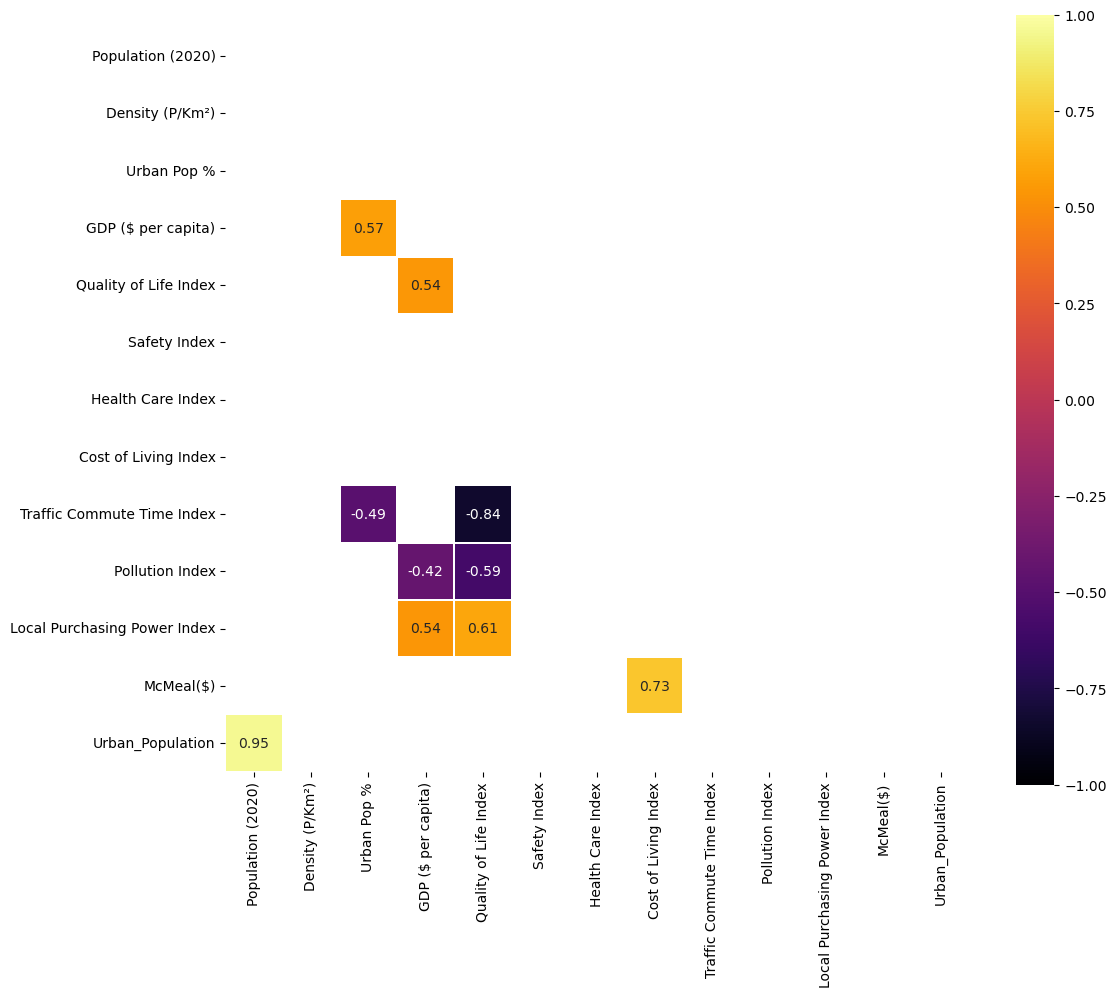

In [239]:
""" We can drop overall Population since it adds noise to the model
Important variables with high correlation are:

Urban Population % (2) 
GDP Per Capita (3) - drop
Quality of Life (3)
Traffic Commute - drop 
Local Purchasing Power 
Cost of Living Index - drop 
Pollution Index """

corr = eda_df.corr()
plt.figure(figsize=(12, 10))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlations, dtype=bool))

# Only show the strong correlations
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)],
            cmap='inferno',
            mask=mask,
            vmax=1.0,
            vmin=-1.0,
            linewidths=0.1,
            annot=True,
            annot_kws={"size": 10},
            square=True);

plt.show()

In [240]:
#To prevent the model having noise from multicollinearity and outliers some columns are dropped   

eda_corr = eda_df.copy()

eda_corr = eda_corr.drop(['Population (2020)', #Urban Population defines a better market
                          'Cost of Living Index', # Local PP can explain better how much can consumers spend
                          'GDP ($ per capita)'], #Local PP can explain better the adquisitive power
                         axis = 'columns') 

#We run the correlation once again 
correlations = eda_corr.corr()
correlations

,Density (P/Km²),Urban Pop %,Quality of Life Index,Safety Index,Health Care Index,Traffic Commute Time Index,Pollution Index,Local Purchasing Power Index,McMeal($),Urban_Population
Density (P/Km²),1.000000,-0.371313,-0.391790,-0.036500,-0.168565,0.365040,0.480185,-0.097584,0.228843,0.051845
Urban Pop %,-0.371313,1.000000,0.481083,-0.189229,0.061482,-0.487636,-0.181924,0.217731,0.268074,-0.059097
Quality of Life Index,-0.391790,0.481083,1.000000,0.229093,0.356732,-0.839293,-0.587586,0.606971,0.033553,0.025152
Safety Index,-0.036500,-0.189229,0.229093,1.000000,0.168599,-0.376505,0.074459,-0.119211,0.073759,0.202567
Health Care Index,-0.168565,0.061482,0.356732,0.168599,1.000000,-0.131990,-0.285515,0.268012,0.035112,0.148866
Traffic Commute Time Index,0.365040,-0.487636,-0.839293,-0.376505,-0.131990,1.000000,0.397790,-0.386630,-0.147679,0.036051
Pollution Index,0.480185,-0.181924,-0.587586,0.074459,-0.285515,0.397790,1.000000,-0.189644,0.309274,0.199927
Local Purchasing Power Index,-0.097584,0.217731,0.606971,-0.119211,0.268012,-0.386630,-0.189644,1.000000,0.021556,0.485886
McMeal($),0.228843,0.268074,0.033553,0.073759,0.035112,-0.147679,0.309274,0.021556,1.000000,-0.164814
Urban_Population,0.051845,-0.059097,0.025152,0.202567,0.148866,0.036051,0.199927,0.485886,-0.164814,1.000000


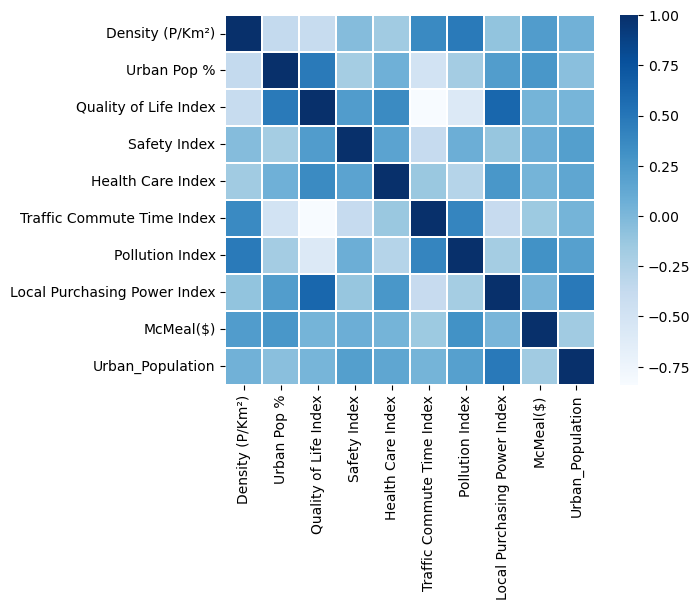

In [241]:
"""The multicollinearity has been fixed, while some indicators may be somewhat high such as LPP and Quality of Life
the model still help us to identify important consumer trends and the target market we need 
"""
sns.heatmap(eda_corr.corr(),
            cmap='Blues',
            annot=False,
            linewidths=0.1,
            annot_kws={"size": 10},
            square=True)

plt.show()

# Problem 2 Defining the demographics for the market size and consumer trends

## Healthcare Index 

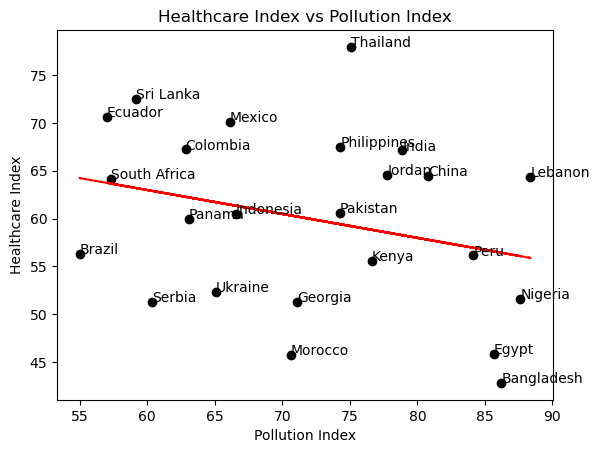

In [242]:
"""Healthcare Index indicates the overall health care coverage per nation, can explain health habits.
The higher the HCI the score, the closest is the population to achieve overall health 
The higher Pollution index the more concern there is towards air quality to exercise outdoors.  """

""" There is a downward trend where the higher the pollution, the less health care per country overall  """

""" Strong candidates are Ecuador, Sri Lanka, South Africa, Panama, Indonesia, Colombia and Mexico"""

healthcare_index = eda_df.loc[:, ['Country','Pollution Index','Health Care Index']].reset_index()

#Line for creating a scatterplot
plt.scatter(healthcare_index['Pollution Index'], healthcare_index['Health Care Index'], color='black')

#Lables 
plt.xlabel('Pollution Index')
plt.ylabel('Healthcare Index')
plt.title('Healthcare Index vs Pollution Index')

# Trendline to see the relation between HCI and PI
z = np.polyfit(healthcare_index['Pollution Index'], healthcare_index['Health Care Index'], 1)
p = np.poly1d(z)
plt.plot(healthcare_index['Pollution Index'], p(healthcare_index['Pollution Index']), "r--")

#Add country labels to visualize the dots, loop each country and add all corresponding labels
for i, country in enumerate(healthcare_index['Country']):
    plt.annotate(country, (healthcare_index['Pollution Index'][i], healthcare_index['Health Care Index'][i]))

#Display
plt.show()

## Urban Population Insights 

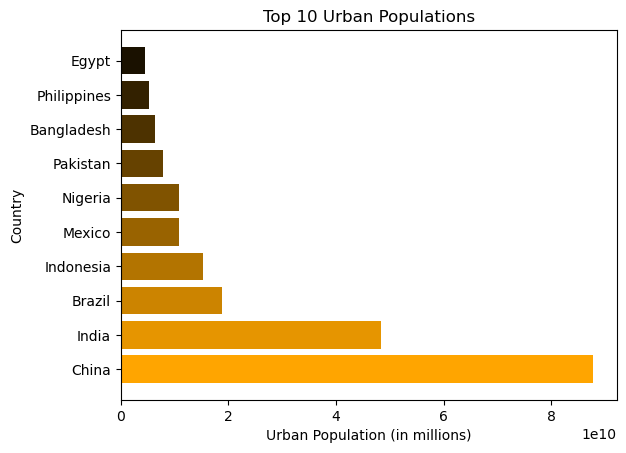

' Analyzing the developing nations, unsurprisingly China, India, Brazil and Indonesia posess the \nhighest market within cities, these could be potential customers looking for a healthy hobby'

In [243]:
#Filter for required urban population columns 
urban_population = eda_df.loc[:, ['Country','Urban_Population']]

#Define different colores for the graph
base_color = 'orange'
num_shades = 10

colors = []
for i in range(num_shades):
    color = mcolors.colorConverter.to_rgb(base_color)
    color = [c * (num_shades - i) / num_shades for c in color]
    colors.append(color)
    

custom_cmap = mcolors.ListedColormap(colors)


#Select top 10 cities with major urban population
top_10_urban_population = urban_population.sort_values(by='Urban_Population',ascending = False).head(10)

#Horizontal graph to retrieve insights 
plt.barh(top_10_urban_population['Country'], top_10_urban_population['Urban_Population'], color=custom_cmap(range(num_shades)))

#Title and lables 
plt.title('Top 10 Urban Populations')
plt.xlabel('Urban Population (in millions)')
plt.ylabel('Country')

#show the graph 
plt.show()

""" Analyzing the developing nations, unsurprisingly China, India, Brazil and Indonesia posess the 
highest market within cities, these could be potential customers looking for a healthy hobby""" 

# Problem 3 Defining Consumer Purchasing Power 

### Local Purchasing Power

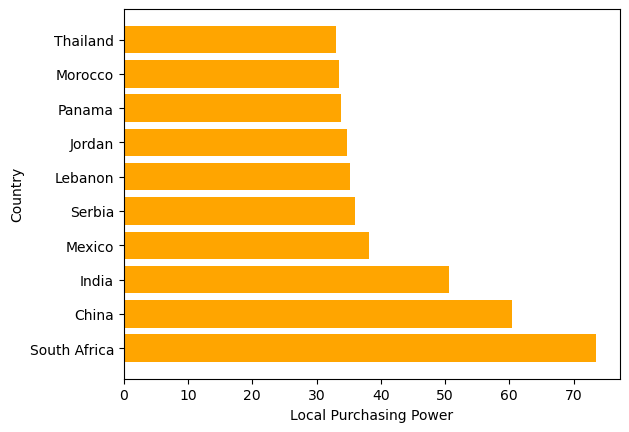

In [244]:
""" We select the countries with the highest purchasing power.
This helps to identify which countries can afford hobbies""" 

#We create a dataframe for LPP and filter the countries with top PP 
LPP = eda_df.loc[:, ['Country','Local Purchasing Power Index']]

# sort the DataFrame by LPPI($)

LPP_sorted = LPP.sort_values(by='Local Purchasing Power Index',ascending = False).head(10)

# create a horizontal bar chart
plt.barh(LPP_sorted['Country'], LPP_sorted['Local Purchasing Power Index'], color='orange')

# set the axis labels
plt.xlabel('Local Purchasing Power') 
plt.ylabel('Country')

# display the plot
plt.show()


### Big Mac Index 

In [245]:
#Now that we have the countries with the highest PP, let's see how their currency fare internationally
LPP_sorted = LPP.sort_values(by='Local Purchasing Power Index',ascending = False).head(10)

#The following countries will be selected and evaluated by the Big Mac Index 
LPP_sorted

,Country,Local Purchasing Power Index
25,South Africa,73.52
0,China,60.44
1,India,50.55
10,Mexico,38.17
107,Serbia,36.04
118,Lebanon,35.28
95,Jordan,34.70
138,Panama,33.79
42,Morocco,33.44
20,Thailand,33.02


In [246]:
#We Filter the United States to find the required index, since Big Mac is based on USD
demo_two[demo_two['Country'].str.contains("United States")]


,Country,Population (2020),Density (P/Km²),Med. Age,Urban Pop %,World Share,GDP ($ per capita),Quality of Life Index,Safety Index,Health Care Index,Cost of Living Index,Traffic Commute Time Index,Pollution Index,Development Status,Local Purchasing Power Index,McMeal($),IOC
2,United States,331341050,36,38,83 %,4.25 %,37800.0,172.11,52.8,69.27,71.05,32.89,36.88,Developed,108.29,8.0,NaN


In [247]:
#We add the USA to the list 
Big_Mac_clean = demo_two.iloc[[25,0,1,10,107,118,95,138,42,20,2],[0,-2]]
Big_Mac_clean.sort_values(by='McMeal($)')

,Country,McMeal($)
25,South Africa,3.94
1,India,4.05
10,Mexico,4.98
0,China,5.31
107,Serbia,5.57
42,Morocco,6.05
20,Thailand,6.59
138,Panama,7.00
95,Jordan,7.05
2,United States,8.00


In [248]:
#Sorting the columns Country, McMeal and Purchasing Power to create a heatmap
Big_Mac_clean = demo_two.iloc[[25,0,1,10,107,118,95,138,42,20,2],[0,-3,-2]]
Big_Mac_clean.sort_values(by='McMeal($)')


,Country,Local Purchasing Power Index,McMeal($)
25,South Africa,73.52,3.94
1,India,50.55,4.05
10,Mexico,38.17,4.98
0,China,60.44,5.31
107,Serbia,36.04,5.57
42,Morocco,33.44,6.05
20,Thailand,33.02,6.59
138,Panama,33.79,7.00
95,Jordan,34.70,7.05
2,United States,108.29,8.00


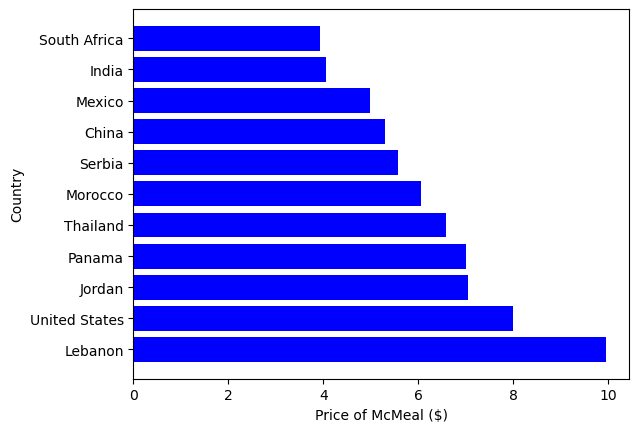

In [249]:
"""While Mexico may not have the biggest population, it does show to have a high HCI.
A population with good air quality, exercise habits and relatively devaluated currency vs the USD
can help the business to understand the required pricing and manage profit by producing locally, 
which in turn can help to reduce costs. 
"""
# sort the DataFrame by McMeal($)
Big_Mac_clean_sorted = Big_Mac_clean.sort_values(by='McMeal($)', ascending = False)

# create a horizontal bar chart
plt.barh(Big_Mac_clean_sorted['Country'], Big_Mac_clean_sorted['McMeal($)'], color='blue')

# set the axis labels
plt.xlabel('Price of McMeal ($)') 
plt.ylabel('Country')

# display the plot
plt.show()


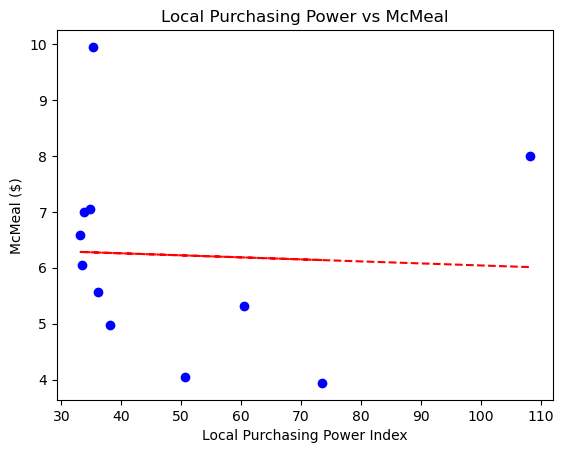

In [250]:
#Creating the heatmap 

# Select specific rows and columns from the DataFrame
Big_Mac_clean = demo_two.iloc[[25,0,1,10,107,118,95,138,42,20,2],[0,-3,-2]]

# Create scatter plot
plt.scatter(Big_Mac_clean['Local Purchasing Power Index'], Big_Mac_clean['McMeal($)'], color='blue')

# Add title and axis labels
plt.xlabel('Local Purchasing Power Index')
plt.ylabel('McMeal ($)')
plt.title('Local Purchasing Power vs McMeal')

# Add trendline
z = np.polyfit(Big_Mac_clean['Local Purchasing Power Index'], Big_Mac_clean['McMeal($)'], 1)
p = np.poly1d(z)
plt.plot(Big_Mac_clean['Local Purchasing Power Index'], p(Big_Mac_clean['Local Purchasing Power Index']), "r--")

# Calculate distances between each point and all the other points
dist = []
for index1, row1 in Big_Mac_clean.iterrows():
    for index2, row2 in Big_Mac_clean.iterrows():
        if index1 != index2:
            d = np.sqrt((row1['Local Purchasing Power Index'] - row2['Local Purchasing Power Index'])**2 + 
                        (row1['McMeal($)'] - row2['McMeal($)'])**2)
            dist.append(d)

# Loop over each row and add country label for the point with the greatest average distance
for i, country in enumerate(Big_Mac_clean['Country']):
    if dist[i] == max(dist):
        plt.annotate(country, (Big_Mac_clean['Local Purchasing Power Index'][i], Big_Mac_clean['McMeal($)'][i]))

# Display plot
plt.show()


## Problem 4 - Overall Quality of Life Per Country 

### Quality of Life per Country 

In [251]:
""" We prepare the graph for top 6 quality of life""" 
eda_quality = eda_corr.loc[:,['Country','Quality of Life Index']].sort_values(by='Quality of Life Index', ascending = False).head(6)
eda_quality 

,Country,Quality of Life Index
25,South Africa,131.97
74,Ecuador,125.14
10,Mexico,118.55
107,Serbia,116.30
143,Georgia,115.95
95,Jordan,112.40


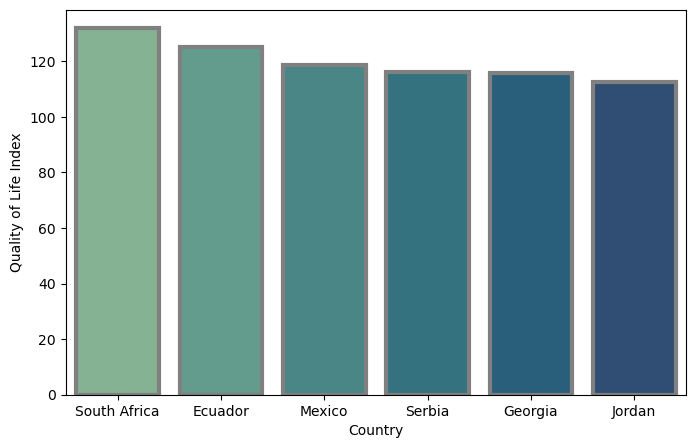

In [252]:
#graph width
plt.figure(figsize=(8, 5))

#Adding color 
palette = sns.color_palette("crest")

#Define different colores for the graph

sns.barplot(data = eda_quality, 
            x = 'Country',
            y = 'Quality of Life Index',
            capsize=.3,
            errcolor=".6",
            linewidth=3,
            edgecolor=".5",
            palette =palette
           )
plt.show()


### Safety Index and Traffic Commute Correlation 

eda_quality = eda_corr.loc[:,['Country','Quality of Life Index']]
eda_quality## Overall Safety Index 


In [253]:
""" We evaluate the safety index and traffic commute  """

eda_safety = eda_corr.loc[:,['Country','Safety Index','Traffic Commute Time Index']].reset_index()
eda_safety

,index,Country,Safety Index,Traffic Commute Time Index
0,0,China,68.17,41.81
1,1,India,56.68,46.99
2,3,Indonesia,54.16,43.11
3,4,Pakistan,55.92,38.56
4,5,Brazil,31.12,41.70
5,6,Nigeria,36.23,61.08
6,7,Bangladesh,36.06,56.73
7,10,Mexico,46.03,39.39
8,13,Philippines,57.84,44.63
9,14,Egypt,53.08,49.78


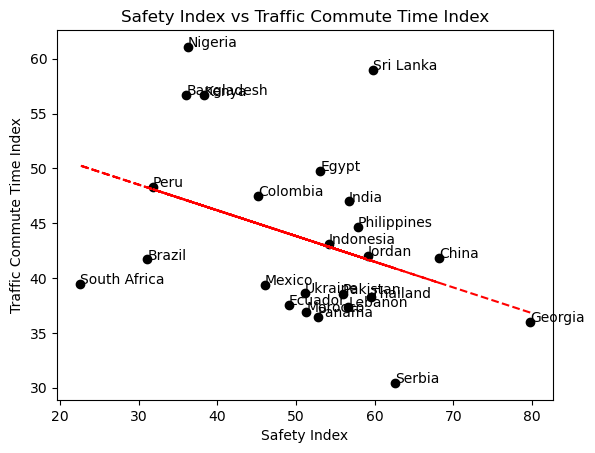

In [254]:
#Scatterplot to find possible relation 

#Line for creating a scatterplot

plt.scatter(eda_safety['Safety Index'], eda_safety['Traffic Commute Time Index'], color='black')

#Lables 
plt.xlabel('Safety Index')
plt.ylabel('Traffic Commute Time Index')
plt.title('Safety Index vs Traffic Commute Time Index')

# Trendline to see the relation between HCI and PI
z = np.polyfit(eda_safety['Safety Index'], eda_safety['Traffic Commute Time Index'], 1)
p = np.poly1d(z)
plt.plot(eda_safety['Safety Index'], p(eda_safety['Safety Index']), "r--")

#Add country labels to visualize the dots, loop each country and add all corresponding labels
for i, country in enumerate(eda_safety['Country']):
    plt.annotate(country, (eda_safety['Safety Index'][i], eda_safety['Traffic Commute Time Index'][i]))

#Display
plt.show()

# Results 

In [255]:

Results = pd.merge(healthcare_index,top_10_urban_population, left_on='Country', right_on = 'Country', how='left')
Results = pd.merge(Results, Big_Mac_clean, left_on = 'Country', right_on = 'Country', how = 'left')
Results = pd.merge(Results, eda_quality, left_on = 'Country', right_on = 'Country', how = 'left')
Results = pd.merge(Results, eda_safety, left_on = 'Country', right_on = 'Country', how = 'left') 
Results


,index_x,Country,Pollution Index,Health Care Index,Urban_Population,Local Purchasing Power Index,McMeal($),Quality of Life Index,index_y,Safety Index,Traffic Commute Time Index
0,0,China,80.77,64.48,8.785817e+10,60.44,5.31,NaN,0,68.17,41.81
1,1,India,78.87,67.13,4.838208e+10,50.55,4.05,NaN,1,56.68,46.99
2,3,Indonesia,66.56,60.48,1.534521e+10,NaN,NaN,NaN,3,54.16,43.11
3,4,Pakistan,74.25,60.59,7.756447e+09,NaN,NaN,NaN,4,55.92,38.56
4,5,Brazil,54.98,56.29,1.872833e+10,NaN,NaN,NaN,5,31.12,41.70
5,6,Nigeria,87.63,51.59,1.076319e+10,NaN,NaN,NaN,6,36.23,61.08
6,7,Bangladesh,86.21,42.80,6.433922e+09,NaN,NaN,NaN,7,36.06,56.73
7,10,Mexico,66.10,70.12,1.084995e+10,38.17,4.98,118.55,10,46.03,39.39
8,13,Philippines,74.28,67.47,5.162025e+09,NaN,NaN,NaN,13,57.84,44.63
9,14,Egypt,85.65,45.84,4.414342e+09,NaN,NaN,NaN,14,53.08,49.78


In [256]:
Results_drop = Results.drop(['index_x','index_y'],axis = 'columns')
Results_clean = Results_drop.dropna(subset = ['Quality of Life Index', 'McMeal($)','Urban_Population'])
Results_clean

,Country,Pollution Index,Health Care Index,Urban_Population,Local Purchasing Power Index,McMeal($),Quality of Life Index,Safety Index,Traffic Commute Time Index
7,Mexico,66.1,70.12,1.084995e+10,38.17,4.98,118.55,46.03,39.39


# Reference Coding 

In [257]:
#example string 
"""weather_td = (
    weather.melt(
        id_vars=['id', 'year', 'month', 'element'],
        var_name='day',
        value_name='temp')
    .pivot_table(
        index=['id', 'year', 'month', 'day'],
        columns='element',
        values='temp')
    .reset_index()
)
weather_td.head()"""

"weather_td = (\n    weather.melt(\n        id_vars=['id', 'year', 'month', 'element'],\n        var_name='day',\n        value_name='temp')\n    .pivot_table(\n        index=['id', 'year', 'month', 'day'],\n        columns='element',\n        values='temp')\n    .reset_index()\n)\nweather_td.head()"

In [258]:
#household.sort_values(by='HouseholdExpenditurePerCapita',ascending=False)
#demo_one = pd.merge(demo_clean, life_quality, left_on='Country', right_on='Country', how='left')
#demo_clean = demo.drop('Country', axis='columns')
#demo_clean.rename(columns = {'Country (or dependency)':'Country'},inplace = True)
#developed['Country Name'] = developed['Country Name'].str.strip()
#prueba = pd.merge(demo_two, lpp, left_on='Country', right_on='Country', how='left')
#prueba.head()
#demographies_eda.to_excel('/Users/fernandogamboa/Desktop/demographics.xlsx', index = False)
#result_df = source_df.drop_duplicates(keep=False)
#use value count formula to check any possible duplicates 
#cantidad de habitantes por bin 
#supply chain


In [259]:
#clean_demographies.to_excel('/Users/fernandogamboa/Downloads/demographics_4.xlsx', index = False)


In [260]:
eda_corr.head()

,Country,Density (P/Km²),Med. Age,Urban Pop %,World Share,Quality of Life Index,Safety Index,Health Care Index,Traffic Commute Time Index,Pollution Index,Development Status,Local Purchasing Power Index,McMeal($),IOC,Urban_Population
0,China,153,38,61,18.47 %,102.81,68.17,64.48,41.81,80.77,Developing,60.44,5.31,CHN,87858167325
1,India,464,28,35,17.70 %,108.63,56.68,67.13,46.99,78.87,Developing,50.55,4.05,IND,48382077975
3,Indonesia,151,30,56,3.51 %,97.47,54.16,60.48,43.11,66.56,Developing,22.19,3.52,INA,15345209824
4,Pakistan,287,23,35,2.83 %,105.44,55.92,60.59,38.56,74.25,Developing,28.39,4.06,PAK,7756447475
5,Brazil,25,33,88,2.73 %,105.65,31.12,56.29,41.70,54.98,Developing,30.36,5.02,BRA,18728334768


In [261]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   name                              249 non-null    object 
 1   official_name_en                  241 non-null    object 
 2   official_name_fr                  241 non-null    object 
 3   ISO3166-1-Alpha-2                 248 non-null    object 
 4   ISO3166-1-Alpha-3                 249 non-null    object 
 5   M49                               251 non-null    int64  
 6   ITU                               233 non-null    object 
 7   MARC                              245 non-null    object 
 8   WMO                               217 non-null    object 
 9   DS                                222 non-null    object 
 10  Dial                              248 non-null    object 
 11  FIFA                              237 non-null    object 
 12  FIPS    